In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Dropout

In [24]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25

In [25]:
# Load MobileNet model
conv_base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
)

In [26]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [30]:
# for layer in conv_base.layers:
#    layer.trainable = False

for i, layer in enumerate (conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_2 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_expa

In [29]:
# Freeze layers in MobileNet except the last few layers
for layer in conv_base.layers:
   layer.trainable = False

# Freeze most layers
for layer in conv_base.layers[:-10]:
   layer.trainable = False

# Fine-tune the last 10 layers
for layer in conv_base.layers[-10:]:
   layer.trainable = True

In [31]:
conv_base.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 28, 28, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 14, 14, 384)          0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 7, 7, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [32]:
# Define your model
model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                4014144   
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 2)                 258       
                                                                 
Total params: 6280706 (23.96 MB)
Trainable params: 4755202 (18.14 MB)
Non-trainable params: 1525504 (5.82 MB)
__________

In [38]:
# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_generator = datagen.flow_from_directory(
    r"D:\Deep Learning & ML\pneumonia_detection\training\chest_x_ray_aug\train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    r"D:\Deep Learning & ML\pneumonia_detection\training\chest_x_ray_aug\valid",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 12230 images belonging to 2 classes.
Found 1747 images belonging to 2 classes.


In [48]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
# Train the model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

Epoch 1/25
383/383 [==============================] - 292s 749ms/step - loss: 0.1586 - accuracy: 0.9433 - val_loss: 9.1092 - val_accuracy: 0.7470
Epoch 2/25
383/383 [==============================] - 293s 766ms/step - loss: 0.1560 - accuracy: 0.9408 - val_loss: 6.4957 - val_accuracy: 0.8689
Epoch 3/25
383/383 [==============================] - 293s 766ms/step - loss: 0.1564 - accuracy: 0.9425 - val_loss: 0.4065 - val_accuracy: 0.9388
Epoch 4/25
383/383 [==============================] - 300s 782ms/step - loss: 0.1399 - accuracy: 0.9496 - val_loss: 0.4352 - val_accuracy: 0.9393
Epoch 5/25
383/383 [==============================] - 296s 773ms/step - loss: 0.1243 - accuracy: 0.9525 - val_loss: 0.3428 - val_accuracy: 0.9428
Epoch 6/25
383/383 [==============================] - 296s 772ms/step - loss: 0.1245 - accuracy: 0.9529 - val_loss: 0.2056 - val_accuracy: 0.9576
Epoch 7/25
383/383 [==============================] - 301s 787ms/step - loss: 0.1185 - accuracy: 0.9554 - val_loss: 2.9017 -

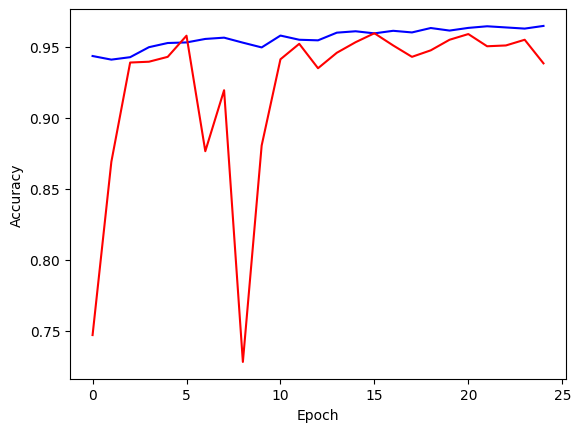

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train', color='blue')
plt.plot(history.history['val_accuracy'], label='valid', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.legend()
plt.show() 

In [46]:
model_version=3
model.save(f"D:\\Deep Learning & ML\\pneumonia_detection\\Project_zip\\Models\\mobilenet2\\{model_version}")

INFO:tensorflow:Assets written to: D:\Deep Learning & ML\pneumonia_detection\Project_zip\Models\mobilenet2\2\assets


INFO:tensorflow:Assets written to: D:\Deep Learning & ML\pneumonia_detection\Project_zip\Models\mobilenet2\2\assets


In [55]:
# Precision and Recall metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

In [51]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Calculate precision and recall separately
predictions = model.predict(validation_generator)
true_labels = validation_generator.classes

# Calculate precision and recall using sklearn.metrics
from sklearn.metrics import precision_score, recall_score

precision = precision_score(true_labels, predictions.argmax(axis=1))
recall = recall_score(true_labels, predictions.argmax(axis=1))

print(f'Precision: {precision}, Recall: {recall}')

55/55 [==============================] - 18s 329ms/step - loss: 0.2172 - accuracy: 0.9382
Loss: 0.2172020822763443, Accuracy: 0.9381797313690186
55/55 [==============================] - 20s 333ms/step
Precision: 0.9809917355371901, Recall: 0.9331761006289309


In [52]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
# import numpy as np
# # Get true labels and predicted labels for validation data
# val_data, val_labels = validation_generator.next()
# val_pred_probs = model.predict(val_data)
# val_pred_labels = np.argmax(val_pred_probs, axis=1)  # Convert predicted probabilities to labels

# # Calculate accuracy
# accuracy = accuracy_score(np.argmax(val_labels, axis=1), val_pred_labels)

# # Calculate precision
# precision = precision_score(np.argmax(val_labels, axis=1), val_pred_labels)

# # Calculate recall
# recall = recall_score(np.argmax(val_labels, axis=1), val_pred_labels)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)

# # You can also print a classification report which includes precision, recall, and F1-score for each class
# print(classification_report(np.argmax(val_labels, axis=1), val_pred_labels))



import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model(r"D:\Deep Learning & ML\pneumonia_detection\Project_zip\Models\mobilenet2\2")

# Generate predictions on the validation data
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
    r"D:\Deep Learning & ML\pneumonia_detection\training\chest_x_ray_aug\valid",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important: do not shuffle for evaluation
)

# Get true labels and predicted labels
Y_true = validation_generator.classes
Y_pred_prob = model.predict(validation_generator)
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Compute precision, recall, and F1 score
precision = precision_score(Y_true, Y_pred)
recall = recall_score(Y_true, Y_pred)
f1 = f1_score(Y_true, Y_pred)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print detailed classification report
print(classification_report(Y_true, Y_pred, target_names=validation_generator.class_indices.keys()))

Found 1747 images belonging to 2 classes.
55/55 [==============================] - 19s 330ms/step
Precision: 0.98
Recall: 0.96
F1 Score: 0.97
              precision    recall  f1-score   support

      NORMAL       0.91      0.94      0.92       475
   PNEUMONIA       0.98      0.96      0.97      1272

    accuracy                           0.96      1747
   macro avg       0.94      0.95      0.95      1747
weighted avg       0.96      0.96      0.96      1747

